In [285]:
import tarfile
import os
from math import *
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

### Extraction

In [236]:
# path to /xsec_dat in extracted files directory
xsec_dat_path = 'xsec_pythia8312'

In [237]:

# get a list of all filenames from /xsec_dat 
file_list = [os.path.join(xsec_dat_path, f) for f in os.listdir(xsec_dat_path) if os.path.isfile(os.path.join(xsec_dat_path, f))]

In [238]:

# read each file into a pandas df
dataframes = {}
for file in file_list:
    try:
        # no header in the files
        df = pd.read_csv(file, delimiter='\t', header=None)
        # store df with filename
        dataframes[file] = df
    except pd.errors.EmptyDataError:
        print(f"Skipping file with no columns to parse: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")


Files from Maximilian Reininghaus for hadronic interaction model datasets: Sibyll 2.3d, EPOS-LHC, QGSJet-II.04 and Pythia 8.3.07.

In [239]:
xsec_max_path = './xsec_max_files'

xs_p_O_sib = loadtxt(f"{xsec_max_path}/xs_p_O_sib23d.dat", unpack=True)
xs_p_O_epos = loadtxt(f"{xsec_max_path}/xs_p_O_EPOS-LHC.dat", unpack=True)
xs_p_O_qgs = loadtxt(f"{xsec_max_path}/xs_p_O_qgsII04.dat", unpack=True)
xs_p_O_py8307 = loadtxt(f"{xsec_max_path}/xs_p_O_Pythia8307.dat", unpack=True)

xs_pip_O_sib = loadtxt(f"{xsec_max_path}/xs_pi_O_sib23d.dat", unpack=True)
xs_pip_O_qgs = loadtxt(f"{xsec_max_path}/xs_pi_O_qgsII04.dat", unpack=True)
xs_pip_O_epos = loadtxt(f"{xsec_max_path}/xs_pi_O_EPOS-LHC.dat", unpack=True)
xs_pip_O_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_O_Pythia8307.dat", unpack=True)

xs_p_p_sib = loadtxt(f"{xsec_max_path}/xs_p_p_sib23d.dat", unpack=True)
xs_p_p_epos = loadtxt(f"{xsec_max_path}/xs_p_p_EPOS-LHC.dat", unpack=True)
xs_p_p_py8307 = loadtxt(f"{xsec_max_path}/xs_p_p_Pythia8307.dat", unpack=True)

xs_pip_p_sib = loadtxt(f"{xsec_max_path}/xs_pi_p_sib23d.dat", unpack=True)
xs_pip_p_epos = loadtxt(f"{xsec_max_path}/xs_pi_p_EPOS-LHC.dat", unpack=True)
xs_pip_p_py8307 = loadtxt(f"{xsec_max_path}/xs_pi_p_Pythia8307.dat", unpack=True)

Exported datasets from Pythia 8.3.10 from jupyter notebook `pythi8310/Pythia8.3.10_cross_section_tables.ipynb`:

In [240]:
xs_p_O_py8310 = [326.561, 357.313, 397.736, 438.032, 484.021, 538.804, 612.224, 694.637, 796.673, 914.109]
xs_p_O_py8310_err = [0.208, 0.276, 0.340, 0.372, 0.340, 0.302, 0.028, 0.289, 0.282, 0.283]
xs_pip_O_py8310 = [261.857, 288.653, 331.384, 383.752, 426.441, 494.747, 555.011, 690.725, 810.340, 737.710]
xs_pip_O_py8310_err = [0.026, 0.010, 0.015, 0.028, 0.025, 0.030, 1.968, 1.841, 1.948, 1.247]
elab_py8310 = [1e+11, 1e+12, 1e+13, 1e+14, 1e+15, 1e+16, 1e+17, 1e+18, 1e+19, 1e+20]

Exported datasets from Pythia 8.3.11 from jupyter notebook `pythi8311/pythia8311_xsec_plotting.ipynb`:

In [241]:
xs_p_p_py8311 = [31.489, 34.421, 39.814 ,  46.915, 55.620, 66.101, 78.671, 93.745, 111.833, 133.556, 159.661]
xs_p_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.002]
xs_pip_p_py8311 = [20.335, 22.651, 26.496, 31.487, 37.612, 45.017, 53.934, 64.665, 77.578, 93.119, 111.707]
xs_pip_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.013]
xs_p_O_py8311 = [311.330, 342.175, 380.661, 422.697, 467.155, 515.759, 570.786, 634.530, 692.921, 778.915, 863.308]
xs_p_O_py8311_err = [0.104, 0.187, 0.302, 0.341, 0.360, 0.298, 0.259, 0.252, 0.229, 0.241, 0.239]
xs_pip_O_py8311 = [252.617, 286.614, 317.381, 365.187, 417.173, 474.305, 482.629, 535.185, 593.296, 675.978, 761.752] 
xs_pip_O_py8311_err = [0.049, 0.147, 0.108, 0.170, 0.168, 0.186, 0.116, 0.116, 0.103, 1.112, 0.131] 

In [242]:
df_sib = pd.read_csv('sig-h-nitrogen-new.out', delim_whitespace=True, header=None, skiprows=22)
elab_sib = df_sib[1]
xs_He_N_sib = df_sib[4]
xs_N_N_sib = df_sib[6]
xs_Fe_N_sib = df_sib[10]

df_sib_new = pd.read_csv('sig-h-nitrogen-new-new.out', delim_whitespace=True, header=None, skiprows=23)
elab_sib_2 = df_sib_new[1]
xs_p_N_sib = df_sib_new[4] 

Files from Tanguy Pierog for hadronic interaction models datasets for (proton, helium-4, nitrogen-14, iron-56) against nitrogen-14 for EPOS-LHC, EPOS LHC-R and QGSJet-II.04.

In [243]:
xsec_tanguy_path = './xsec_tanguy_files'

xs_p_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmapN_eposlhc.dat", unpack=True)
xs_p_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmapN_eposlhcr.dat", unpack=True)
xs_p_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmapN_qgsjetII04.dat", unpack=True)

xs_He_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmaHeN_eposlhc.dat", unpack=True)
xs_He_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmaHeN_eposlhcr.dat", unpack=True)
xs_He_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmaHeN_qgsjetII04.dat", unpack=True)

xs_N_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmaNN_eposlhc.dat", unpack=True)
xs_N_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmaNN_eposlhcr.dat", unpack=True)
xs_N_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmaNN_qgsjetII04.dat", unpack=True)

xs_Fe_N_eposlhc = loadtxt(f"{xsec_tanguy_path}/sigmaFeN_eposlhc.dat", unpack=True)
xs_Fe_N_eposlhcr = loadtxt(f"{xsec_tanguy_path}/sigmaFeN_eposlhcr.dat", unpack=True)
xs_Fe_N_qgsjetII04 = loadtxt(f"{xsec_tanguy_path}/sigmaFeN_qgsjetII04.dat", unpack=True)

### Selection

Filter out only filenames matching `main1010_p_16p*.dat` and `main1010_pip_16p*.dat` for simulations using oxygen-16 as a target, and `main1010_p_1H*.dat` and `main1010_pip_1H*.dat` for simulations using a proton as a target.

In [244]:
p_p_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_p_1H" in file}
pip_p_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_pip_1H" in file}
p_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_p_14N" in file}
pip_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_pip_14N" in file}
p_O_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_p_16O" in file}
pip_O_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_pip_16O" in file}

He_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_4He_14N" in file}
N_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_14N_14N" in file}
Fe_N_filtered_dataframes = {file: df for file, df in dataframes.items() if "main1011_56Fe_14N" in file}

In [245]:
p_p_dataframes = []

for file, df in p_p_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_p_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_p_dataframes.append(p_p_dataframe)
p_p_dataframe = pd.concat(p_p_dataframes, ignore_index=True)
p_p_dataframe = p_p_dataframe.sort_values(by='elab')


In [246]:
pip_p_dataframes = []

for file, df in pip_p_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_p_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_p_dataframes.append(pip_p_dataframe)
pip_p_dataframe = pd.concat(pip_p_dataframes, ignore_index=True)
pip_p_dataframe = pip_p_dataframe.sort_values(by='elab')


In [247]:
p_O_dataframes = []

for file, df in p_O_filtered_dataframes.items():
    # extract rows labeled sig_inel, err_inel and elab
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_O_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_O_dataframes.append(p_O_dataframe)
p_O_dataframe = pd.concat(p_O_dataframes, ignore_index=True)
p_O_dataframe = p_O_dataframe.sort_values(by='elab')


In [248]:
pip_O_dataframes = []

for file, df in pip_O_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_O_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_O_dataframes.append(pip_O_dataframe)
pip_O_dataframe = pd.concat(pip_O_dataframes, ignore_index=True)
pip_O_dataframe = pip_O_dataframe.sort_values(by='elab')


In [249]:
pip_N_dataframes = []

for file, df in pip_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    pip_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pip_N_dataframes.append(pip_N_dataframe)
pip_N_dataframe = pd.concat(pip_N_dataframes, ignore_index=True)
pip_N_dataframe = pip_N_dataframe.sort_values(by='elab')


In [250]:
p_N_dataframes = []

for file, df in p_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    p_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    p_N_dataframes.append(p_N_dataframe)
p_N_dataframe = pd.concat(p_N_dataframes, ignore_index=True)
p_N_dataframe = p_N_dataframe.sort_values(by='elab')


In [251]:
He_N_dataframes = []

for file, df in He_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    He_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    He_N_dataframes.append(He_N_dataframe)
He_N_dataframe = pd.concat(He_N_dataframes, ignore_index=True)
He_N_dataframe = He_N_dataframe.sort_values(by='elab')

In [252]:
N_N_dataframes = []

for file, df in N_N_filtered_dataframes.items():
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]   
    N_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    N_N_dataframes.append(N_N_dataframe)
N_N_dataframe = pd.concat(N_N_dataframes, ignore_index=True)
N_N_dataframe = N_N_dataframe.sort_values(by='elab')

In [253]:
Fe_N_dataframes = []

for file, df in Fe_N_filtered_dataframes.items():
    if 'sig_inel' in df[0].values and 'err_inel' in df[0].values:
        sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
        err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
        elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]
        sig_inel_value = sig_inel.values[0]
        err_inel_value = err_inel.values[0]
        Fe_N_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel_value], 'err_inel': [err_inel_value]})
        Fe_N_dataframes.append(Fe_N_dataframe)

Fe_N_dataframe = pd.concat(Fe_N_dataframes, ignore_index=True)
Fe_N_dataframe = Fe_N_dataframe.sort_values(by='elab')

### Plotting

In [254]:
pp_stat_error = 7
pp_syst_error_pos = 9
pp_syst_error_neg = 11
pp_glauber_error = 7

pp_total_error_pos = sqrt(pp_stat_error**2 + pp_syst_error_pos**2 + pp_glauber_error**2)
pp_total_error_neg = sqrt(pp_stat_error**2 + pp_syst_error_neg**2 + pp_glauber_error**2)

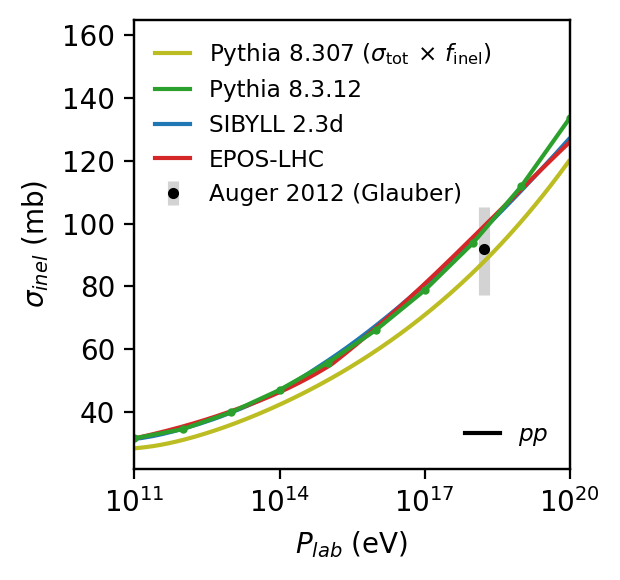

In [255]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(10**18.24, 92, yerr=[[pp_total_error_neg], [pp_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012 (Glauber)")
ax.plot(xs_p_p_py8307[0,:], xs_p_p_py8307[1,:] * 0.9, "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(p_O_dataframe['elab']*1e9, xs_p_p_py8311, yerr=xs_p_p_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], "--", color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(p_p_dataframe['elab']*1e9, p_p_dataframe['sig_inel'], yerr=p_p_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_p_p_sib[0,:], xs_p_p_sib[1,:], "-", color="tab:blue", label="SIBYLL 2.3d")
ax.plot(xs_p_p_epos[0,:], xs_p_p_epos[1,:], "-", color="tab:red", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$pp$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp.png", dpi=400)

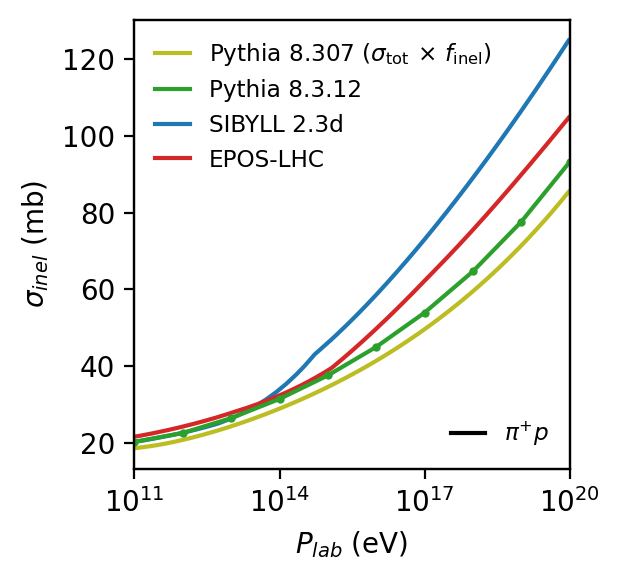

In [256]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_pip_p_py8307[0,:], xs_pip_p_py8307[1,:] * 0.92, "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(pip_p_dataframe['elab']*1e9, xs_pip_p_py8311, yerr=xs_pip_p_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], "--", color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(pip_p_dataframe['elab']*1e9, pip_p_dataframe['sig_inel'], yerr=pip_p_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_pip_p_sib[0,:], xs_pip_p_sib[1,:], "-", color="tab:blue", label="SIBYLL 2.3d")
ax.plot(xs_pip_p_epos[0,:], xs_pip_p_epos[1,:], "-", color="tab:red", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label=r"$\pi^{+}p$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pip.png", dpi=400)

In [257]:
pair_stat_error = 22
pair_syst_error_pos = 28
pair_syst_error_neg = 36
pair_total_error_pos = sqrt(pair_stat_error**2 + pair_syst_error_pos**2)
pair_total_error_neg = sqrt(pair_stat_error**2 + pair_syst_error_neg**2)

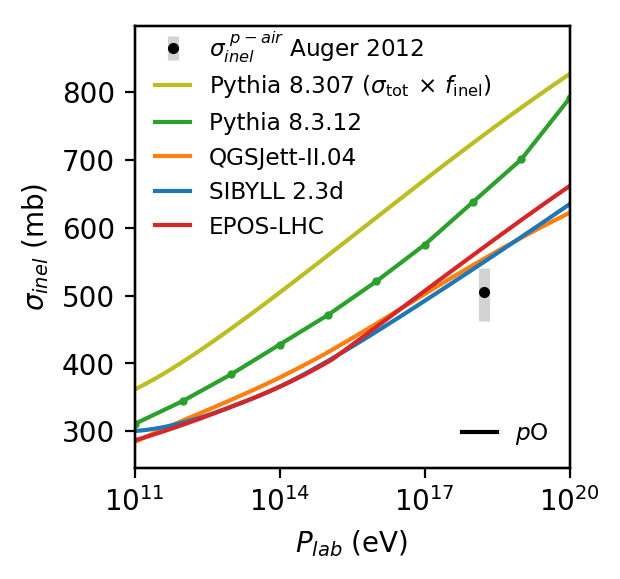

In [258]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_p_O_py8307[0,:], xs_p_O_py8307[1,:] * 0.9, "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(elab_py8310, xs_p_O_py8310, yerr=xs_p_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], ls='--', color="tab:purple", label="Pythia 8.3.10")
#ax.errorbar(p_O_dataframe['elab']*1e9, xs_p_O_py8311, yerr=xs_p_O_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
#ax.plot([None], [None], ls='--', color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(p_O_dataframe['elab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], "-", color="tab:orange", label="QGSJett-II.04")
ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "-", color="tab:blue", label="SIBYLL 2.3d")
ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "-", color="tab:red", label="EPOS-LHC")
#ax.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="Auger 2012")
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize="small", frameon=False, handlelength=1.5)

ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="$\sigma^{\\ p-air}_{inel}$ Auger 2012")
#ax3.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="$\sigma^{\\ p-air}_{inel}$ Auger 2012 & 2015")
#ax3.errorbar(10**17.9, 457.5, yerr=17.8, c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
#ax3.errorbar(10**18.2, 485.8, yerr=15.8, c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.04), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$p$O")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pO.png", dpi=400)

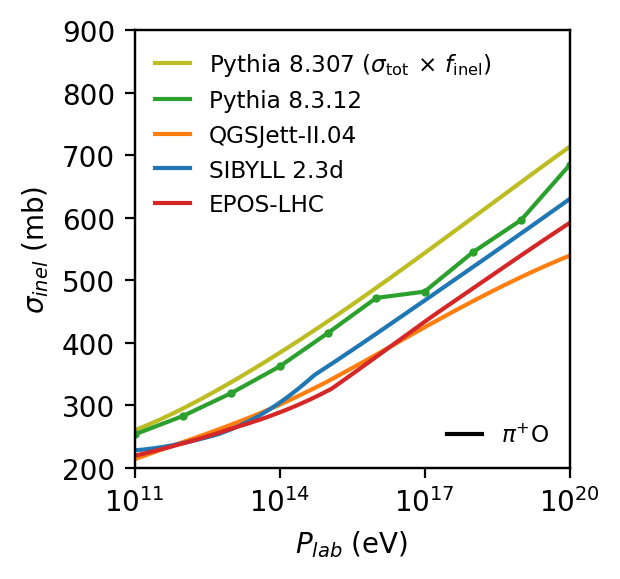

In [259]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20), ylim=(200,900))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_pip_O_py8307[0,:], xs_pip_O_py8307[1,:] * 0.92, "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
#ax.errorbar(elab_py8310, xs_pip_O_py8310, yerr=xs_pip_O_py8310_err, c='tab:purple', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
#ax.plot([None], [None], "-", color="tab:purple", label="Pythia 8.3.10")
#ax.errorbar(pip_O_dataframe['elab']*1e9, xs_pip_O_py8311, yerr=xs_pip_O_py8311_err, c='tab:orange', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
#ax.plot([None], [None], "-", color="tab:orange", label="Pythia 8.3.11")
ax.errorbar(pip_O_dataframe['elab']*1e9, pip_O_dataframe['sig_inel'], yerr=pip_O_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot([None], [None], ls='-', color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_pip_O_qgs[0,:], xs_pip_O_qgs[1,:], "-", color="tab:orange", label="QGSJett-II.04")
ax.plot(xs_pip_O_sib[0,:], xs_pip_O_sib[1,:], "-", color="tab:blue", label="SIBYLL 2.3d")
ax.plot(xs_pip_O_epos[0,:], xs_pip_O_epos[1,:], "-", color="tab:red", label="EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label=r"$\pi^{+}$O")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_piO.png", dpi=400)

In [260]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

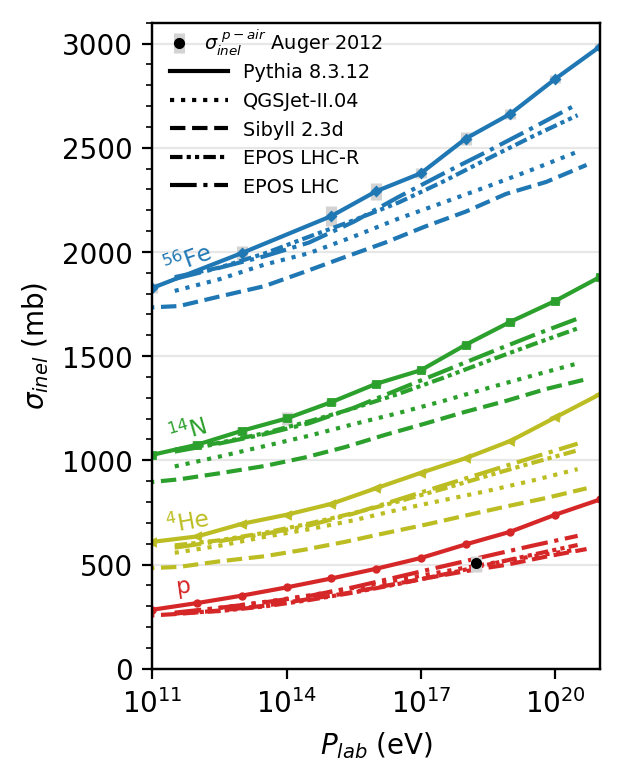

In [304]:
fig, ax = plt.subplots(figsize=(3.2,4), dpi=200)
#ax.set_title("X $^{14}$N interactions with Pythia 8.3.12", fontsize=7)
ax.set(xlim=(1e11,1e21))
ax.set(ylim=(0,3100))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(Fe_N_dataframe['elab']*1e9, Fe_N_dataframe['sig_inel'], yerr=Fe_N_dataframe['err_inel'], c='tab:blue', fmt='D', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot((10 ** elab_sib)*1e9, xs_Fe_N_sib, "--", color="tab:blue")
ax.plot(xs_Fe_N_eposlhc[0]*1e9, xs_Fe_N_eposlhc[1], "-.", color="tab:blue")
ax.plot(xs_Fe_N_eposlhcr[0]*1e9, xs_Fe_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:blue")
ax.plot(xs_Fe_N_qgsjetII04[0]*1e9, xs_Fe_N_qgsjetII04[1], ':', color="tab:blue")
#ax.plot([None], [None], ls='-', color="tab:blue", label="$^{56}$Fe")
ax.text(10 ** 11.8, 1890, "$^{56}$Fe", fontsize="small", ha='center', color='tab:blue', rotation=20)

ax.errorbar(N_N_dataframe['elab']*1e9, N_N_dataframe['sig_inel'], yerr=N_N_dataframe['err_inel'], c='tab:green', fmt='s', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot((10 ** elab_sib)*1e9, xs_N_N_sib, "--", color="tab:green")
ax.plot(xs_N_N_eposlhc[0]*1e9, xs_N_N_eposlhc[1], "-.", color="tab:green")
ax.plot(xs_N_N_eposlhcr[0]*1e9, xs_N_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:green")
ax.plot(xs_N_N_qgsjetII04[0]*1e9, xs_N_N_qgsjetII04[1], ':', color="tab:green")
#ax.plot([None], [None], ls='-', color="tab:green", label="$^{14}$N")
ax.text(10 ** 11.8, 1080, "$^{14}$N", fontsize="small", ha='center', color='tab:green', rotation=16)

ax.errorbar(He_N_dataframe['elab']*1e9, He_N_dataframe['sig_inel'], yerr=He_N_dataframe['err_inel'], c='tab:olive', fmt='<', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot((10 ** elab_sib)*1e9, xs_He_N_sib, "--", color="tab:olive")
ax.plot(xs_He_N_eposlhc[0]*1e9, xs_He_N_eposlhc[1], "-.", color="tab:olive")
ax.plot(xs_He_N_eposlhcr[0]*1e9, xs_He_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:olive")
ax.plot(xs_He_N_qgsjetII04[0]*1e9, xs_He_N_qgsjetII04[1], ':', color="tab:olive")
#ax.plot([None], [None], ls='-', color="tab:olive", label="$^{4}$He")
ax.text(10 ** 11.8, 650, "$^{4}$He", fontsize="small", ha='center', color='tab:olive', rotation=10)

ax.errorbar(p_N_dataframe['elab']*1e9, p_N_dataframe['sig_inel'], yerr=p_N_dataframe['err_inel'], c='tab:red', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.plot((10 ** elab_sib_2)*1e9, xs_p_N_sib, "--", color="tab:red")
ax.plot(xs_p_N_eposlhc[0]*1e9, xs_p_N_eposlhc[1], "-.", color="tab:red")
ax.plot(xs_p_N_eposlhcr[0]*1e9, xs_p_N_eposlhcr[1], linestyle=((0, (3, 1, 1, 1, 1, 1))), color="tab:red")
ax.plot(xs_p_N_qgsjetII04[0]*1e9, xs_p_N_qgsjetII04[1], ':', color="tab:red")
#ax.plot([None], [None], ls='-', color="tab:red", label="p")
ax.text(10 ** 11.7, 360, "p", fontsize="small", ha='center', color='tab:red', rotation=8)

ax.plot([None], [None], "-", color="black", label="Pythia 8.3.12")
ax.plot([None], [None], ":", color="black", label="QGSJet-II.04")
ax.plot([None], [None], "--", color="black", label="Sibyll 2.3d")
ax.plot([None], [None], linestyle=(0, (3, 1, 1, 1, 1, 1)), color="black", label="EPOS LHC-R")
ax.plot([None], [None], "-.", color="black", label="EPOS LHC")

#ax.text(10 ** 20, 200, "X $^{14}$N", fontsize="small", ha='center', color='black')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.965), fontsize="x-small", frameon=False, handlelength=3)

ax.grid(visible=True, which='major', axis='y', alpha=0.3)
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
ax.set_yticks(range(0, 3200, 100), minor=True)
ax.yaxis.set_ticks_position('both') 
ax.tick_params(axis='y', which='both', labelright=False)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.get_yaxis().set_visible(False)
ax2.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="$\sigma^{\\ p-air}_{inel}$ Auger 2012")
ax2.legend(loc='upper left', bbox_to_anchor=(0, 1.02), fontsize="x-small", frameon=False, handlelength=1)

fig.tight_layout()
fig.savefig("xs_inel_XN.png", dpi=400)

In [266]:
print(xs_p_N_eposlhc[1])
print(xs_p_N_sib)
print(p_N_dataframe['sig_inel'])

[269.3 292.4 318.4 349.2 391.4 441.5 492.  542.  590.9 637.6]
0     252.1
1     263.5
2     279.5
3     302.2
4     331.0
5     361.0
6     397.8
7     433.7
8     468.3
9     498.6
10    538.2
11    574.4
Name: 4, dtype: float64
4     283.132
1     315.174
8     350.823
2     390.363
0     433.286
7     479.873
10    531.485
5     596.771
3     657.597
6     739.061
9     812.088
Name: sig_inel, dtype: float64


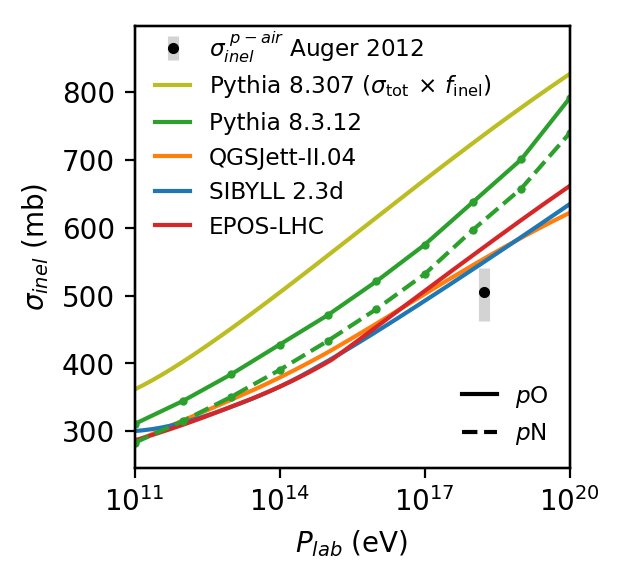

In [263]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.plot(xs_p_O_py8307[0,:], xs_p_O_py8307[1,:] * 0.9, "-", color="tab:olive", label="Pythia 8.307 ($\\sigma_{\\mathrm{tot}} \\, \\times \\, f_{\\mathrm{inel}}$)")
ax.errorbar(p_O_dataframe['elab']*1e9, p_O_dataframe['sig_inel'], yerr=p_O_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='-')
ax.errorbar(p_N_dataframe['elab']*1e9, p_N_dataframe['sig_inel'], yerr=p_N_dataframe['err_inel'], c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], ls='-', color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_p_O_qgs[0,:], xs_p_O_qgs[1,:], "-", color="tab:orange", label="QGSJett-II.04")
ax.plot(xs_p_O_sib[0,:], xs_p_O_sib[1,:], "-", color="tab:blue", label="SIBYLL 2.3d")
ax.plot(xs_p_O_epos[0,:], xs_p_O_epos[1,:], "-", color="tab:red", label="EPOS-LHC")
#ax.text(10 ** 13.3, 550, "$\sigma^{\\ p-air}_{inel}$", fontsize="small", ha='center', color='black')
#ax.text(10 ** 19.2, 495, "$\sigma^{\\ p-air}_{inel}$", fontsize="small", ha='center', color='black')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize="small", frameon=False, handlelength=1.5)

ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.get_yaxis().set_visible(False)
ax3.errorbar(10**18.24, 505, yerr=[[pair_total_error_neg], [pair_total_error_pos]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4, label="$\sigma^{\\ p-air}_{inel}$ Auger 2012")
ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.04), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label=r"$p$O")
ax2.plot([None], [None], "--", color="black", label=r"$p$N")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pN_pO.png", dpi=400)